<h1 align=center> 
    <font size = 5>Well logging Clustering</font>  
</h1>





## Introduction 

Data is only useful when you are able to discover the insights, however, it becomes something difficult to achive in large data. A good aproach to solve this problem is segmentation. in the data science field it is called clustering.
There are many models for clustering, this time, we will use a model that is considering the simpliest amongst them, K-means.


By clustering well logging, it becomes easier for us to see correlations between areas aparently different, which means a better understanding of the whole formation.


### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Getting data

The data used in this notebook was downloaded from <a href="https://catalog.data.gov/dataset/logs-and-data-from-utah-forge-deep-well-58-32-mu-esw1-efac6"> www.data.gov </a>.  This dataset is intended for public access and use.

Read de csv file with all the data logs 

In [2]:
pd.set_option('display.max_columns', None)
#Create a dataframe
df=pd.read_csv('Run2_TCOM_Main.csv')
df.drop(labels='Unnamed: 0', axis=1, inplace=True)
df

,DEPT,AF10,AF20,AF30,AF60,AF90,AO10,AO20,AO30,AO60,AO90,AT10,AT20,AT30,AT60,AT90,AORT,AORX,CDF,CFTC,CNTC,CTEM,DCAL,DNPH,DPHZ,DSOZ,ECGR,ED,GDEV,GR,GR_EDTC,GTEM,HCAL,HDRA,HDRB,HGR,HMIN,HMNO,HNPO,HPRA,HTNP,ND,NPHI,NPOR,PEFZ,PXND_HILT,RHOZ,RSOZ,RWA_HILT,RXO8,RXOZ,SP,SPAR,STIT,TENS,TNPH,HTNP_SAN,ATCO10,ATCO20,ATCO30,ATCO60,ATCO90
0,10.5,1.104,0.4224,20.9881,1950.0000,44.9381,1.1341,0.5586,2.1295,1.7824,2.5706,1.1898,0.4901,28.0289,70.7004,19.7369,1.7765,1.2661,823.5559,472.7008,-999.2500,141.8353,0.0,-999.25,-999.25,0.4559,235.6517,-0.0014,-999.2500,160.0384,116.5213,114.7630,3.4667,0.252,0.9375,260.5359,-999.2500,-999.2500,0.3744,-0.2806,0.3744,-0.0192,-999.2500,-999.25,8.3337,0.2732,2.2207,-999.2500,-999.25,-999.2500,-999.2500,-999.2500,-999.2500,0.0,940.9999,-999.25,0.3744,840.4879,2040.4220,35.6775,14.1442,50.6664
1,11.0,1.104,0.4224,20.9881,1950.0000,44.9381,1.1341,0.5586,2.1295,1.7824,2.5706,1.1898,0.4901,28.0289,70.7004,19.7369,1.7765,1.2661,823.5559,472.7008,-999.2500,141.8353,0.0,-999.25,-999.25,0.4559,235.6517,-0.0014,-999.2500,160.0384,73.0505,114.8318,3.4667,0.252,0.9375,260.5359,-999.2500,-999.2500,0.3744,-0.2806,0.3744,-0.0192,-999.2500,-999.25,8.3337,0.2732,2.2207,-999.2500,-999.25,-999.2500,-999.2500,-999.2500,-999.2500,0.0,940.9999,-999.25,0.3744,840.4879,2040.4220,35.6775,14.1442,50.6664
2,11.5,1.104,0.4224,20.9881,1950.0000,44.9381,1.1341,0.5586,2.1295,1.7824,2.5706,1.1898,0.4901,28.0289,70.7004,19.7369,1.7765,1.2661,823.5559,472.7008,-999.2500,141.8353,0.0,-999.25,-999.25,0.4559,235.6517,-0.0014,-999.2500,160.0384,46.5878,114.8318,3.4667,0.252,0.9375,260.5359,-999.2500,-999.2500,0.3744,-0.2806,0.3744,-0.0192,-999.2500,-999.25,8.3337,0.2732,2.2207,-999.2500,-999.25,-999.2500,-999.2500,-999.2500,-999.2500,0.0,940.9999,-999.25,0.3744,840.4879,2040.4220,35.6775,14.1442,50.6664
3,12.0,1.104,0.4224,20.9881,1950.0000,44.9381,1.1341,0.5586,2.1295,1.7824,2.5706,1.1898,0.4901,28.0289,70.7004,19.7369,1.7765,1.2661,823.5559,472.7008,-999.2500,141.8353,0.0,-999.25,-999.25,0.4559,235.6517,-0.0014,-999.2500,160.0384,42.4624,114.8318,3.4667,0.252,0.9375,260.5359,-999.2500,-999.2500,0.3744,-0.2806,0.3744,-0.0192,-999.2500,-999.25,8.3337,0.2732,2.2207,-999.2500,-999.25,-999.2500,-999.2500,-999.2500,-999.2500,0.0,940.9999,-999.25,0.3744,840.4879,2040.4220,35.6775,14.1442,50.6664
4,12.5,1.104,0.4224,20.9881,1950.0000,44.9381,1.1341,0.5586,2.1295,1.7824,2.5706,1.1898,0.4901,28.0289,70.7004,19.7369,1.7765,1.2661,823.5559,472.7008,-999.2500,141.8353,0.0,-999.25,-999.25,0.4559,235.6517,-0.0014,-999.2500,160.0384,43.7616,114.8318,3.4667,0.252,0.9375,161.1709,-999.2500,-999.2500,0.3744,-0.2806,0.3744,-0.0192,-999.2500,-999.25,8.3337,0.2732,2.2207,-999.2500,-999.25,-999.2500,-999.2500,-999.2500,-999.2500,0.0,940.9999,-999.25,0.3744,840.4879,2040.4220,35.6775,14.1442,50.6664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15123,7572.0,1950.000,236.2897,135.8063,555.1772,1950.0000,1950.0000,172.8385,130.5535,489.0653,1240.9810,1950.0000,183.9162,133.9417,536.4155,1950.0000,337.5478,1636.8724,55.1092,-999.2500,9024.6523,264.3764,0.0,-999.25,-999.25,-999.2500,180.8282,-183.3115,0.7922,185.2172,178.0801,289.4600,3.2134,-999.250,-999.2500,195.0093,4.1406,6.5153,-999.2500,-999.2500,-999.2500,-14.3562,0.0105,-999.25,-999.2500,-999.2500,-999.2500,0.5044,-999.25,63.8509,63.8509,64.2308,63.9401,0.0,1863.3334,-999.25,-999.2500,0.5000,5.4373,7.4659,1.8642,0.5000
15124,7572.5,1950.000,236.2897,135.8063,555.1772,1950.0000,1950.0000,172.8385,130.5535,489.0653,1240.9810,1950.0000,183.9162,133.9417,536.4155,1950.0000,337.5478,1636.8724,54.5232,-999.2500,9024.6523,264.3764,0.0,-999.25,-999.25,-999.2500,180.8282,-183.3392,0.7922,185.2172,178.0801,289.4600,3.2134,-999.250,-999.2500,195.0093,4.1406,6.5153,-999.2500,-999.2500,-999.2500,-14.3585,0.0105,-999.25,-

## Ploting Data 

Create a new dataframe, we can set the dept range of the data we want to display

In [3]:
Min= 0
Max= 7600

logs= df[(df.DEPT>Min) & (df.DEPT<Max)]

Chose the columns you want to plot an set them in the right measurement units and scale 

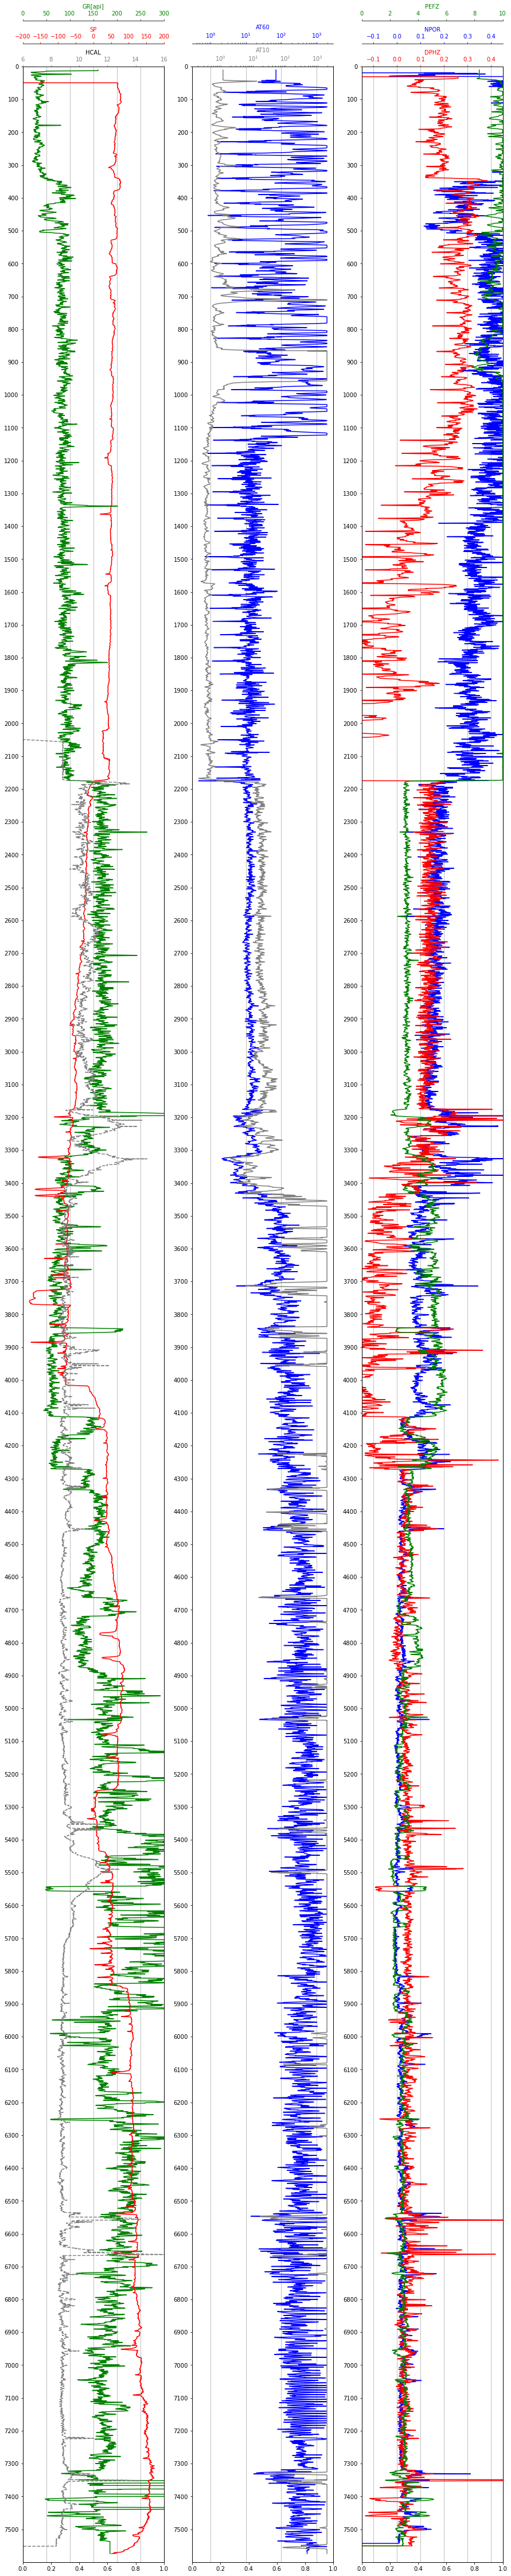

In [4]:
fig, ax= plt.subplots(nrows=1, ncols=3,figsize=(15, 80))

for a in ax:
    a.set_yticks(np.arange(0, max(logs['DEPT'].values), 100.0)) #set the X intervals 
    a.set_ylim( Min, Max )
    a.invert_yaxis()

#------------------|column 1|--------   
ax01= ax[0].twiny()
ax01.set_xlim(0,300)
ax01.plot( logs['GR'].values, logs['DEPT'].values, color='green') #select the data and the color
ax01.set_xlabel('GR[api]',color='green') #set the name
ax01.spines['top'].set_position(('outward',80)) #Set range line 
ax01.tick_params(axis='x', colors='green')  #set the color of the 'spine'
ax01.grid(True)

c='red'
ax02= ax[0].twiny()
ax02.set_xlim(-200,200)
ax02.plot( logs['SP'].values, logs['DEPT'].values, color=c) 
ax02.set_xlabel('SP',color=c) 
ax02.spines['top'].set_position(('outward',40))
ax02.tick_params(axis='x', colors=c)

c='gray'
ax03= ax[0].twiny()
ax03.set_xlim(6,16)
ax03.plot( logs['HCAL'].values, logs['DEPT'].values,'--', color=c) 
ax03.set_xlabel('HCAL',color='black') 
ax03.spines['top'].set_position(('outward',0))
ax03.tick_params(axis='x', colors=c)

#------------------|column 2|-------- 
c='blue'
ax11= ax[1].twiny()
ax11.set_xscale('log') #set logaritmic scale
#ax11.set_xlim(0,100)
ax11.plot( logs['AT60'].values, logs['DEPT'].values, color=c) 
ax11.set_xlabel('AT60',color=c) 
ax11.spines['top'].set_position(('outward',40))
ax11.tick_params(axis='x', colors=c)
ax11.grid(True)

c='gray'
ax12= ax[1].twiny()
ax12.set_xscale('log')
#ax12.set_xlim(0,100)
ax12.plot( logs['AT10'].values, logs['DEPT'].values, color=c) 
ax12.set_xlabel('AT10',color=c) 
ax12.spines['top'].set_position(('outward',0))
ax12.tick_params(axis='x', colors=c)

#------------------|column 3|-------- 
c='blue'
ax21= ax[2].twiny()
ax21.set_xlim(-.15,.45)
ax21.plot( logs['NPOR'].values, logs['DEPT'].values, color=c) 
ax21.set_xlabel('NPOR',color=c) 
ax21.spines['top'].set_position(('outward',40))
ax21.tick_params(axis='x', colors=c)
ax21.grid(True)

c='Red'
ax22= ax[2].twiny()
ax22.set_xlim(-.15,.45)
ax22.plot( logs['DPHZ'].values, logs['DEPT'].values, color=c) 
ax22.set_xlabel('DPHZ',color=c) 
ax22.spines['top'].set_position(('outward',0))
ax22.tick_params(axis='x', colors=c)

c='green'
ax22= ax[2].twiny()
ax22.set_xlim(0,10)
ax22.plot( logs['PEFZ'].values, logs['DEPT'].values, color=c) 
ax22.set_xlabel('PEFZ',color=c) 
ax22.spines['top'].set_position(('outward',80))
ax22.tick_params(axis='x', colors=c)

## Pre-processing

in the first 50 meters of tne well logging, the tools present abnormal responses. Those responses will  produce errors in the mathematical model. in order to avoid those disturbances, we will drop the first 100 m.

lets look for this position. (100m)

In [5]:
df[df['DEPT']==100]

,DEPT,AF10,AF20,AF30,AF60,AF90,AO10,AO20,AO30,AO60,AO90,AT10,AT20,AT30,AT60,AT90,AORT,AORX,CDF,CFTC,CNTC,CTEM,DCAL,DNPH,DPHZ,DSOZ,ECGR,ED,GDEV,GR,GR_EDTC,GTEM,HCAL,HDRA,HDRB,HGR,HMIN,HMNO,HNPO,HPRA,HTNP,ND,NPHI,NPOR,PEFZ,PXND_HILT,RHOZ,RSOZ,RWA_HILT,RXO8,RXOZ,SP,SPAR,STIT,TENS,TNPH,HTNP_SAN,ATCO10,ATCO20,ATCO30,ATCO60,ATCO90
179,100.0,1.0669,0.3632,22.5882,1950.0,116.7097,0.8871,0.4395,2.3142,3.4848,6.1007,1.0229,0.419,15.1079,170.0617,13.0856,2.788,1.0086,775.8344,327.1172,1266.4661,143.8118,0.0,-0.0209,0.2018,0.4053,42.9006,-0.0059,1.5123,34.2507,21.8787,119.368,3.4788,0.26,0.9354,32.4997,0.6103,0.4127,0.4556,-1.8675,0.5077,-0.0784,0.5574,0.459,9.9982,0.3374,2.317,0.3046,19.3641,0.4235,0.4235,76.9531,76.725,0.0,873.0001,0.5069,0.5077,977.6158,2386.7688,66.1906,5.8802,76.4198


In [6]:
#179 is the position where 100m ends 
x = df[179:]
x.head()

,DEPT,AF10,AF20,AF30,AF60,AF90,AO10,AO20,AO30,AO60,AO90,AT10,AT20,AT30,AT60,AT90,AORT,AORX,CDF,CFTC,CNTC,CTEM,DCAL,DNPH,DPHZ,DSOZ,ECGR,ED,GDEV,GR,GR_EDTC,GTEM,HCAL,HDRA,HDRB,HGR,HMIN,HMNO,HNPO,HPRA,HTNP,ND,NPHI,NPOR,PEFZ,PXND_HILT,RHOZ,RSOZ,RWA_HILT,RXO8,RXOZ,SP,SPAR,STIT,TENS,TNPH,HTNP_SAN,ATCO10,ATCO20,ATCO30,ATCO60,ATCO90
179,100.0,1.0669,0.3632,22.5882,1950.0,116.7097,0.8871,0.4395,2.3142,3.4848,6.1007,1.0229,0.4190,15.1079,170.0617,13.0856,2.7880,1.0086,775.8344,327.1172,1266.4661,143.8118,0.0,-0.0209,0.2018,0.4053,42.9006,-0.0059,1.5123,34.2507,21.8787,119.368,3.4788,0.2600,0.9354,32.4997,0.6103,0.4127,0.4556,-1.8675,0.5077,-0.0784,0.5574,0.4590,9.9982,0.3374,2.3170,0.3046,19.3641,0.4235,0.4235,76.9531,76.7250,0.0,873.0001,0.5069,0.5077,977.6158,2386.7688,66.1906,5.8802,76.4198
180,100.5,1.0799,0.3687,27.2645,1950.0,111.7548,1.0483,0.4580,2.9169,2.3608,4.0447,1.0690,0.4308,27.4326,150.2215,16.9982,2.6946,1.0042,767.7578,309.4816,1295.9174,143.8118,0.0,-0.0114,0.1974,0.4055,41.3992,-0.0060,1.0275,33.0520,25.4397,119.368,3.4667,0.2648,0.9438,35.1644,0.6070,0.4110,0.6252,-2.1512,0.6116,-0.0792,0.5058,0.6073,10.0000,0.3675,2.3242,0.3048,20.2909,0.4226,0.4224,76.3281,76.6533,0.0,852.0000,0.6009,0.6116,935.4244,2320.9966,36.4529,6.6568,58.8299
181,101.0,1.0912,0.3746,32.5201,1950.0,96.7937,1.1655,0.4950,3.7339,3.3036,5.3531,1.0871,0.4419,48.7968,118.8006,12.6155,2.5636,0.9881,773.0978,325.6334,1293.8101,143.8118,0.0,-0.0191,0.1954,0.4026,42.0430,-0.0060,0.6390,33.5660,29.5028,119.368,3.4788,0.2657,0.9520,33.5660,0.6082,0.4109,0.5476,-2.1422,0.5323,-0.0800,0.5654,0.5554,10.0000,0.3409,2.3275,0.3046,13.8054,0.4213,0.4214,76.5625,76.5747,0.0,837.0000,0.5309,0.5323,919.9154,2262.8186,20.4932,8.4175,79.2677
182,101.5,1.0902,0.3798,34.3147,1950.0,80.3259,1.0560,0.4639,2.3942,2.8136,3.7452,1.0664,0.4479,34.1096,89.4196,12.6858,2.4614,0.9547,777.0771,306.5539,1279.6381,143.8118,0.0,-0.0120,0.1974,0.3986,41.5422,-0.0061,1.1088,33.1662,31.0151,119.368,3.4547,0.2607,0.9565,33.5657,0.6033,0.4086,0.6681,-1.8202,0.6019,-0.0808,0.5684,0.5984,10.0000,0.3658,2.3244,0.3034,11.9637,0.4203,0.4207,75.7639,76.2017,0.0,899.0000,0.5966,0.6019,937.7034,2232.6646,29.3172,11.1832,78.8280
183,102.0,1.0756,0.3861,38.1528,1950.0,64.0619,1.0107,0.4528,2.9139,1.8001,2.2353,1.0046,0.4610,35.8575,73.3911,7.9139,2.4405,0.9064,771.4240,297.2666,1257.4928,143.8118,0.0,-0.0090,0.1923,0.4019,43.5442,-0.0062,0.0000,34.7645,28.0309,119.368,3.4547,0.2614,0.9730,31.7008,0.6007,0.4080,0.6458,-1.3604,0.6426,-0.0816,0.5615,0.6068,9.9567,0.3726,2.3327,0.3024,10.1873,0.4209,0.4209,75.9375,76.1153,0.0,876.0000,0.6198,0.6426,995.3771,2169.1350,27.8881,13.6256,126.3597


Check for null values

In [7]:
x.isnull().sum()

DEPT      0
AF10      0
AF20      0
AF30      0
AF60      0
         ..
ATCO10    0
ATCO20    0
ATCO30    0
ATCO60    0
ATCO90    0
Length: 62, dtype: int64

As we can see, there are not null values.

One consideration to make is if it is better to normalize the dataset or not.It helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally, but sometimes it does Not help to perform the model. We use StandardScaler() to normalize our dataset.


In [8]:
x_nor = StandardScaler().fit_transform(x)
x_nor

array([[-1.73193495, -1.11389697, -0.54865804, ...,  0.75250703,
        -0.44489088,  0.07320247],
       [-1.73170322, -1.11388342, -0.5486467 , ...,  0.2027381 ,
        -0.43377683, -0.09031439],
       [-1.73147149, -1.11387165, -0.54863452, ..., -0.0923132 ,
        -0.40857915,  0.09967673],
       ...,
       [ 1.73147149,  0.91705273, -0.061865  , ..., -0.33315243,
        -0.50236454, -0.63255296],
       [ 1.73170322,  0.91705273, -0.061865  , ..., -0.33315243,
        -0.50236454, -0.63255296],
       [ 1.73193495,  0.91705273, -0.061865  , ..., -0.33315243,
        -0.50236454, -0.63255296]])

## Clustering Data

After using use the normalized and Not normalized data to perform the model. I realize the model performs better with the original data (x). 

In [9]:
kmeans = KMeans( n_clusters=5, init='k-means++', n_init=25, max_iter=400, random_state=0).fit(x)
kmeans.labels_[0:15]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

add the cluster labels to de dataframe

In [10]:
#df_clusters.drop(df.index, inplace=True)

df_clusters= x[:]
df_clusters.insert(0, 'Cluster Labels', kmeans.labels_)
df_clusters.head()

,Cluster Labels,DEPT,AF10,AF20,AF30,AF60,AF90,AO10,AO20,AO30,AO60,AO90,AT10,AT20,AT30,AT60,AT90,AORT,AORX,CDF,CFTC,CNTC,CTEM,DCAL,DNPH,DPHZ,DSOZ,ECGR,ED,GDEV,GR,GR_EDTC,GTEM,HCAL,HDRA,HDRB,HGR,HMIN,HMNO,HNPO,HPRA,HTNP,ND,NPHI,NPOR,PEFZ,PXND_HILT,RHOZ,RSOZ,RWA_HILT,RXO8,RXOZ,SP,SPAR,STIT,TENS,TNPH,HTNP_SAN,ATCO10,ATCO20,ATCO30,ATCO60,ATCO90
179,2,100.0,1.0669,0.3632,22.5882,1950.0,116.7097,0.8871,0.4395,2.3142,3.4848,6.1007,1.0229,0.4190,15.1079,170.0617,13.0856,2.7880,1.0086,775.8344,327.1172,1266.4661,143.8118,0.0,-0.0209,0.2018,0.4053,42.9006,-0.0059,1.5123,34.2507,21.8787,119.368,3.4788,0.2600,0.9354,32.4997,0.6103,0.4127,0.4556,-1.8675,0.5077,-0.0784,0.5574,0.4590,9.9982,0.3374,2.3170,0.3046,19.3641,0.4235,0.4235,76.9531,76.7250,0.0,873.0001,0.5069,0.5077,977.6158,2386.7688,66.1906,5.8802,76.4198
180,2,100.5,1.0799,0.3687,27.2645,1950.0,111.7548,1.0483,0.4580,2.9169,2.3608,4.0447,1.0690,0.4308,27.4326,150.2215,16.9982,2.6946,1.0042,767.7578,309.4816,1295.9174,143.8118,0.0,-0.0114,0.1974,0.4055,41.3992,-0.0060,1.0275,33.0520,25.4397,119.368,3.4667,0.2648,0.9438,35.1644,0.6070,0.4110,0.6252,-2.1512,0.6116,-0.0792,0.5058,0.6073,10.0000,0.3675,2.3242,0.3048,20.2909,0.4226,0.4224,76.3281,76.6533,0.0,852.0000,0.6009,0.6116,935.4244,2320.9966,36.4529,6.6568,58.8299
181,2,101.0,1.0912,0.3746,32.5201,1950.0,96.7937,1.1655,0.4950,3.7339,3.3036,5.3531,1.0871,0.4419,48.7968,118.8006,12.6155,2.5636,0.9881,773.0978,325.6334,1293.8101,143.8118,0.0,-0.0191,0.1954,0.4026,42.0430,-0.0060,0.6390,33.5660,29.5028,119.368,3.4788,0.2657,0.9520,33.5660,0.6082,0.4109,0.5476,-2.1422,0.5323,-0.0800,0.5654,0.5554,10.0000,0.3409,2.3275,0.3046,13.8054,0.4213,0.4214,76.5625,76.5747,0.0,837.0000,0.5309,0.5323,919.9154,2262.8186,20.4932,8.4175,79.2677
182,2,101.5,1.0902,0.3798,34.3147,1950.0,80.3259,1.0560,0.4639,2.3942,2.8136,3.7452,1.0664,0.4479,34.1096,89.4196,12.6858,2.4614,0.9547,777.0771,306.5539,1279.6381,143.8118,0.0,-0.0120,0.1974,0.3986,41.5422,-0.0061,1.1088,33.1662,31.0151,119.368,3.4547,0.2607,0.9565,33.5657,0.6033,0.4086,0.6681,-1.8202,0.6019,-0.0808,0.5684,0.5984,10.0000,0.3658,2.3244,0.3034,11.9637,0.4203,0.4207,75.7639,76.2017,0.0,899.0000,0.5966,0.6019,937.7034,2232.6646,29.3172,11.1832,78.8280
183,2,102.0,1.0756,0.3861,38.1528,1950.0,64.0619,1.0107,0.4528,2.9139,1.8001,2.2353,1.0046,0.4610,35.8575,73.3911,7.9139,2.4405,0.9064,771.4240,297.2666,1257.4928,143.8118,0.0,-0.0090,0.1923,0.4019,43.5442,-0.0062,0.0000,34.7645,28.0309,119.368,3.4547,0.2614,0.9730,31.7008,0.6007,0.4080,0.6458,-1.3604,0.6426,-0.0816,0.5615,0.6068,9.9567,0.3726,2.3327,0.3024,10.1873,0.4209,0.4209,75.9375,76.1153,0.0,876.0000,0.6198,0.6426,995.3771,2169.1350,27.8881,13.6256,126.3597


In [11]:
Min=150
Max=7600

plot the data with the cluster labels

In [12]:
logs = df_clusters[(df_clusters.DEPT>Min) & (df_clusters.DEPT<Max)]

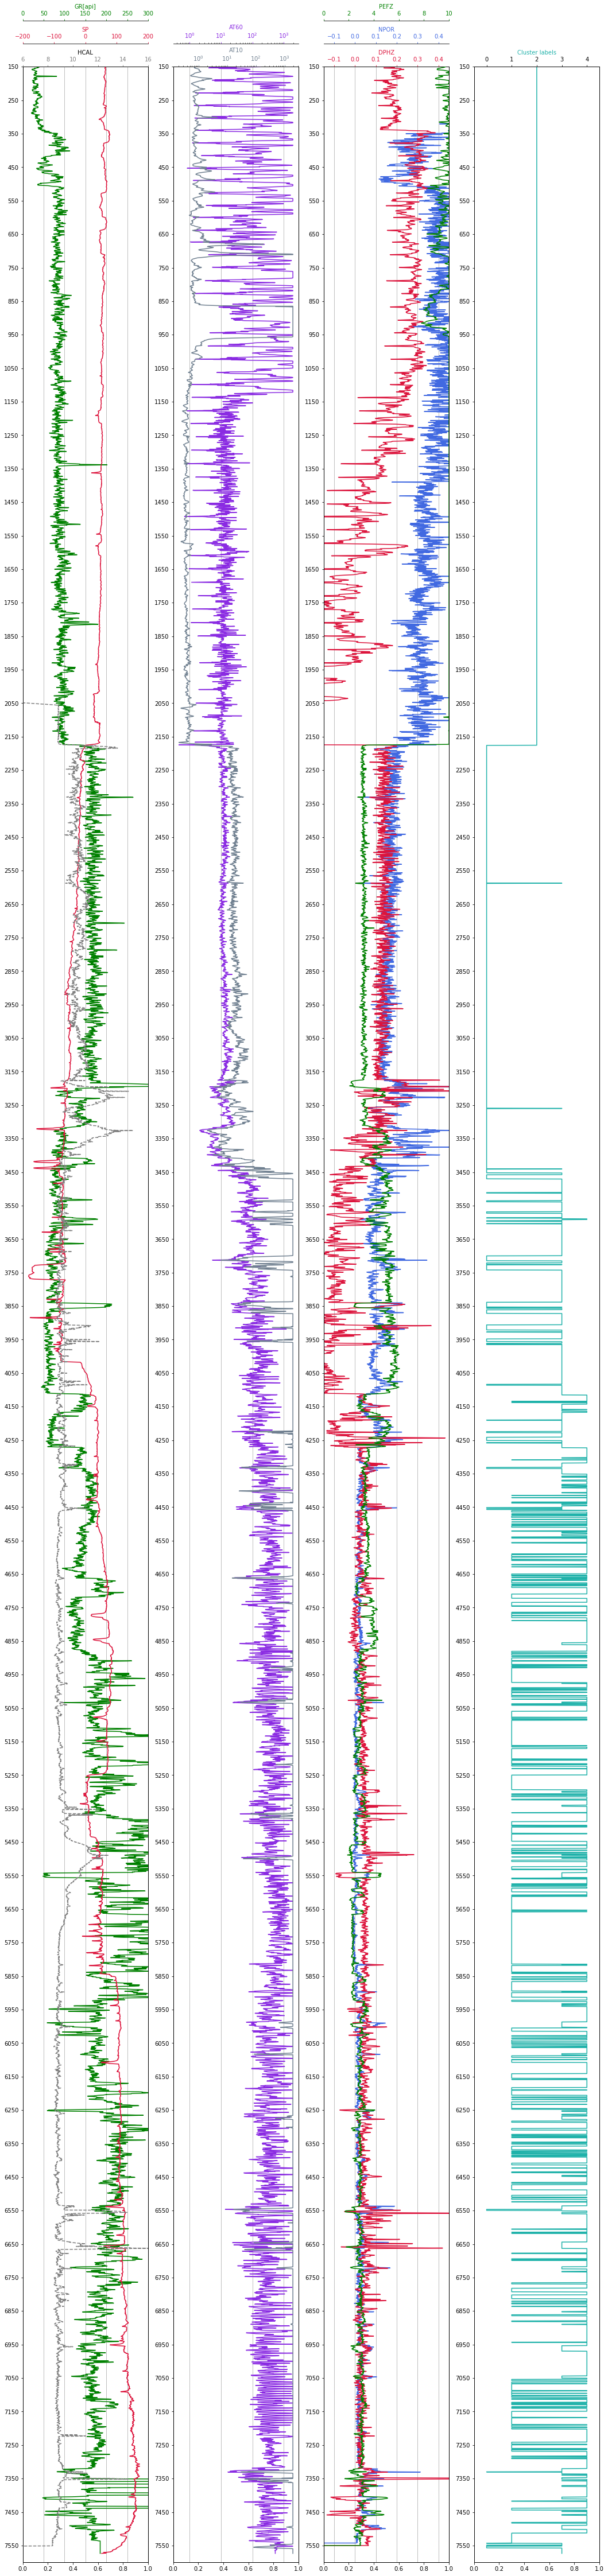

In [13]:
fig, ax= plt.subplots(nrows=1, ncols=4,figsize=(18, 80))

for a in ax:
    a.set_yticks(np.arange(min(logs['DEPT'].values), max(logs['DEPT'].values), 100.0))
    a.set_ylim(  Min, Max  )
    a.invert_yaxis()

    
    
#------------------||--------   
ax01= ax[0].twiny()
ax01.set_xlim(0,300)
ax01.plot( logs['GR'].values, logs['DEPT'].values, color='green') #select the data and the color
ax01.set_xlabel('GR[api]',color='green') #set the name
ax01.spines['top'].set_position(('outward',80)) #Set range line 
ax01.tick_params(axis='x', colors='green')  #set the color of the 'spine'
ax01.grid(True)


c='Crimson'
ax02= ax[0].twiny()
ax02.set_xlim(-200,200)
ax02.plot( logs['SP'].values, logs['DEPT'].values, color=c) 
ax02.set_xlabel('SP',color=c) 
ax02.spines['top'].set_position(('outward',40))
ax02.tick_params(axis='x', colors=c)


c='gray'
ax03= ax[0].twiny()
ax03.set_xlim(6,16)
ax03.plot( logs['HCAL'].values, logs['DEPT'].values,'--', color=c) 
ax03.set_xlabel('HCAL',color='black') 
ax03.spines['top'].set_position(('outward',0))
ax03.tick_params(axis='x', colors=c)

#-----------------------------
c='BlueViolet'
ax11= ax[1].twiny()
ax11.set_xscale('log')
ax11.plot( logs['AT60'].values, logs['DEPT'].values, color=c) 
ax11.set_xlabel('AT60',color=c) 
ax11.spines['top'].set_position(('outward',40))
ax11.tick_params(axis='x', colors=c)
ax11.grid(True)

c='SlateGray'
ax12= ax[1].twiny()
ax12.set_xscale('log')
ax12.plot( logs['AT10'].values, logs['DEPT'].values, color=c) 
ax12.set_xlabel('AT10',color=c) 
ax12.spines['top'].set_position(('outward',0))
ax12.tick_params(axis='x', colors=c)

#-----------------------------------
c='RoyalBlue'
ax21= ax[2].twiny()
ax21.set_xlim(-.15,.45)
ax21.plot( logs['NPOR'].values, logs['DEPT'].values, color=c) 
ax21.set_xlabel('NPOR',color=c) 
ax21.spines['top'].set_position(('outward',40))
ax21.tick_params(axis='x', colors=c)
ax21.grid(True)

c='Crimson'
ax22= ax[2].twiny()
ax22.set_xlim(-.15,.45)
ax22.plot( logs['DPHZ'].values, logs['DEPT'].values, color=c) 
ax22.set_xlabel('DPHZ',color=c) 
ax22.spines['top'].set_position(('outward',0))
ax22.tick_params(axis='x', colors=c)


c='green'
ax22= ax[2].twiny()
ax22.set_xlim(0,10)
ax22.plot( logs['PEFZ'].values, logs['DEPT'].values, color=c) 
ax22.set_xlabel('PEFZ',color=c) 
ax22.spines['top'].set_position(('outward',80))
ax22.tick_params(axis='x', colors=c)
            

#------------------|  fourth  |--------------------
c='LightSeaGreen'
ax31=ax[3].twiny()
ax31.set_xlim(-.5,4.5)
ax31.set_xlabel('Cluster labels',color=c) 
ax31.plot( logs['Cluster Labels'].values, logs['DEPT'].values, color=c) 

In [14]:
df_clusters['Cluster Labels'].value_counts()

2    4153
4    3672
0    2859
1    2381
3    1884
Name: Cluster Labels, dtype: int64

We can check the frequency of each cluster by making a graph

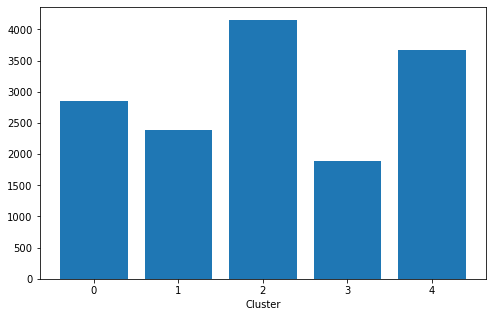

In [15]:
names=['0','1','2','3','4']
values=df_clusters['Cluster Labels'].value_counts().sort_index()


plt.figure(figsize=(8, 5))
plt.bar(names, values)
plt.xlabel('Cluster')
plt.show()